# How to transcribe documents with Claude

Claude 3 is great at reading unstructured text and information within images and PDFs and turning it into structured text. We'll take a look at a few examples but first let's setup the code we need to run the notebook.

In [ ]:
%pip install anthropic IPython

In [6]:
import base64
from anthropic import Anthropic
client = Anthropic()
MODEL_NAME = "claude-3-opus-20240229"

def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

## Transcribing typed text

The advantage of using Claude 3 over traditional OCR systems is that you can specify exactly what you want to transcribe due to Claude 3's advanced reasoning capabilities. For this image, let’s transcribe just the code in the answer.

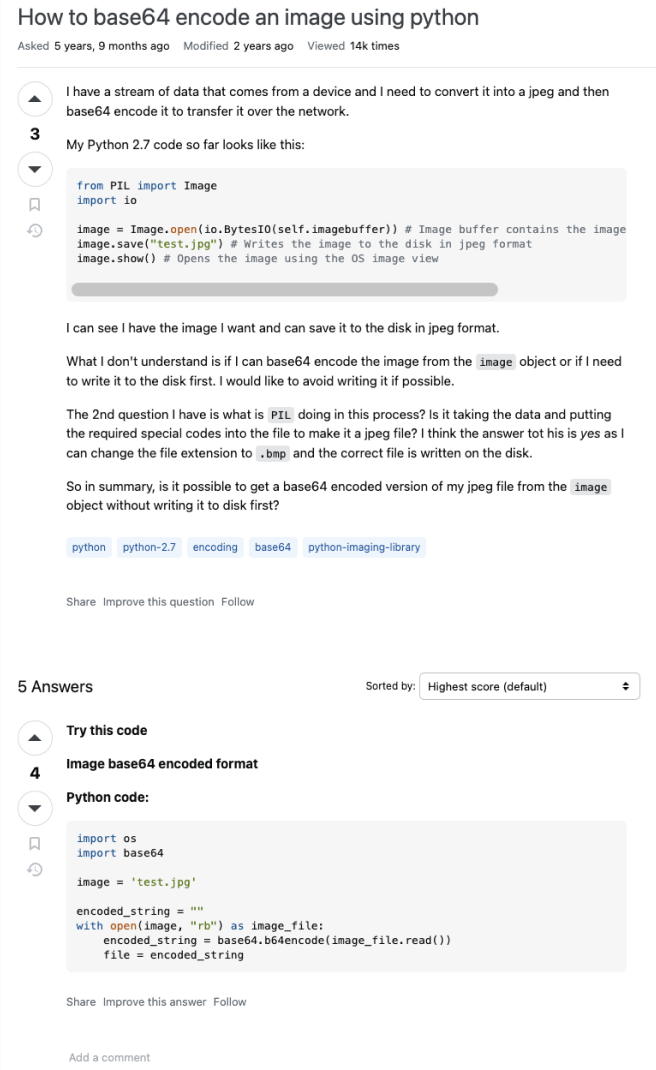

In [7]:
from IPython.display import Image
Image(filename='../images/transcribe/stack_overflow.png') 

In [8]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("../images/transcribe/stack_overflow.png")}},
            {"type": "text", "text": "Transcribe the code in the answer. Only output the code."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

import os
import base64

image = 'test.jpg'

encoded_string = ""
with open(image, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
file = encoded_string


## Transcribing handwritten text

That's good but let's try something a little harder. Claude 3 excels at transcribing handwritten text as well. Let's ask Claude 3 to transcribe this handwritten prescription note.

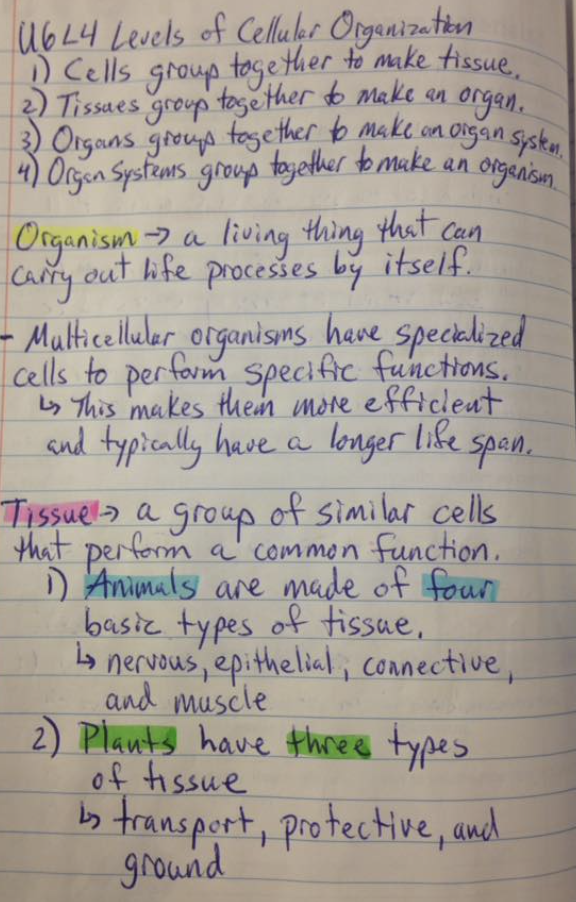

In [10]:
Image(filename='../images/transcribe/school_notes.png') 

In [12]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image("../images/transcribe/school_notes.png")}},
            {"type": "text", "text": "Transcribe this text. Only output the text and nothing else."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

Levels of Cellular Organization
1) Cells group together to make tissue.
2) Tissues group together to make an organ.
3) Organs group together to make an organ system
4) Organ systems group together to make an organism

Organism -> a living thing that can
carry out life processes by itself.

- Multicellular organisms have specialized
cells to perform specific functions.
> This makes them more efficient
and typically have a longer life span.

Tissue = a group of similar cells
that perform a common function.
1) Animals are made of four
basic types of tissue
> nervous, epithelial, connective,
and muscle
2) Plants have three types
of tissue
> transport, protective, and
ground


## Transcribing forms
How about we try a combination of typed and handwritten text? This is common across a variety of documents like insurance and report forms.

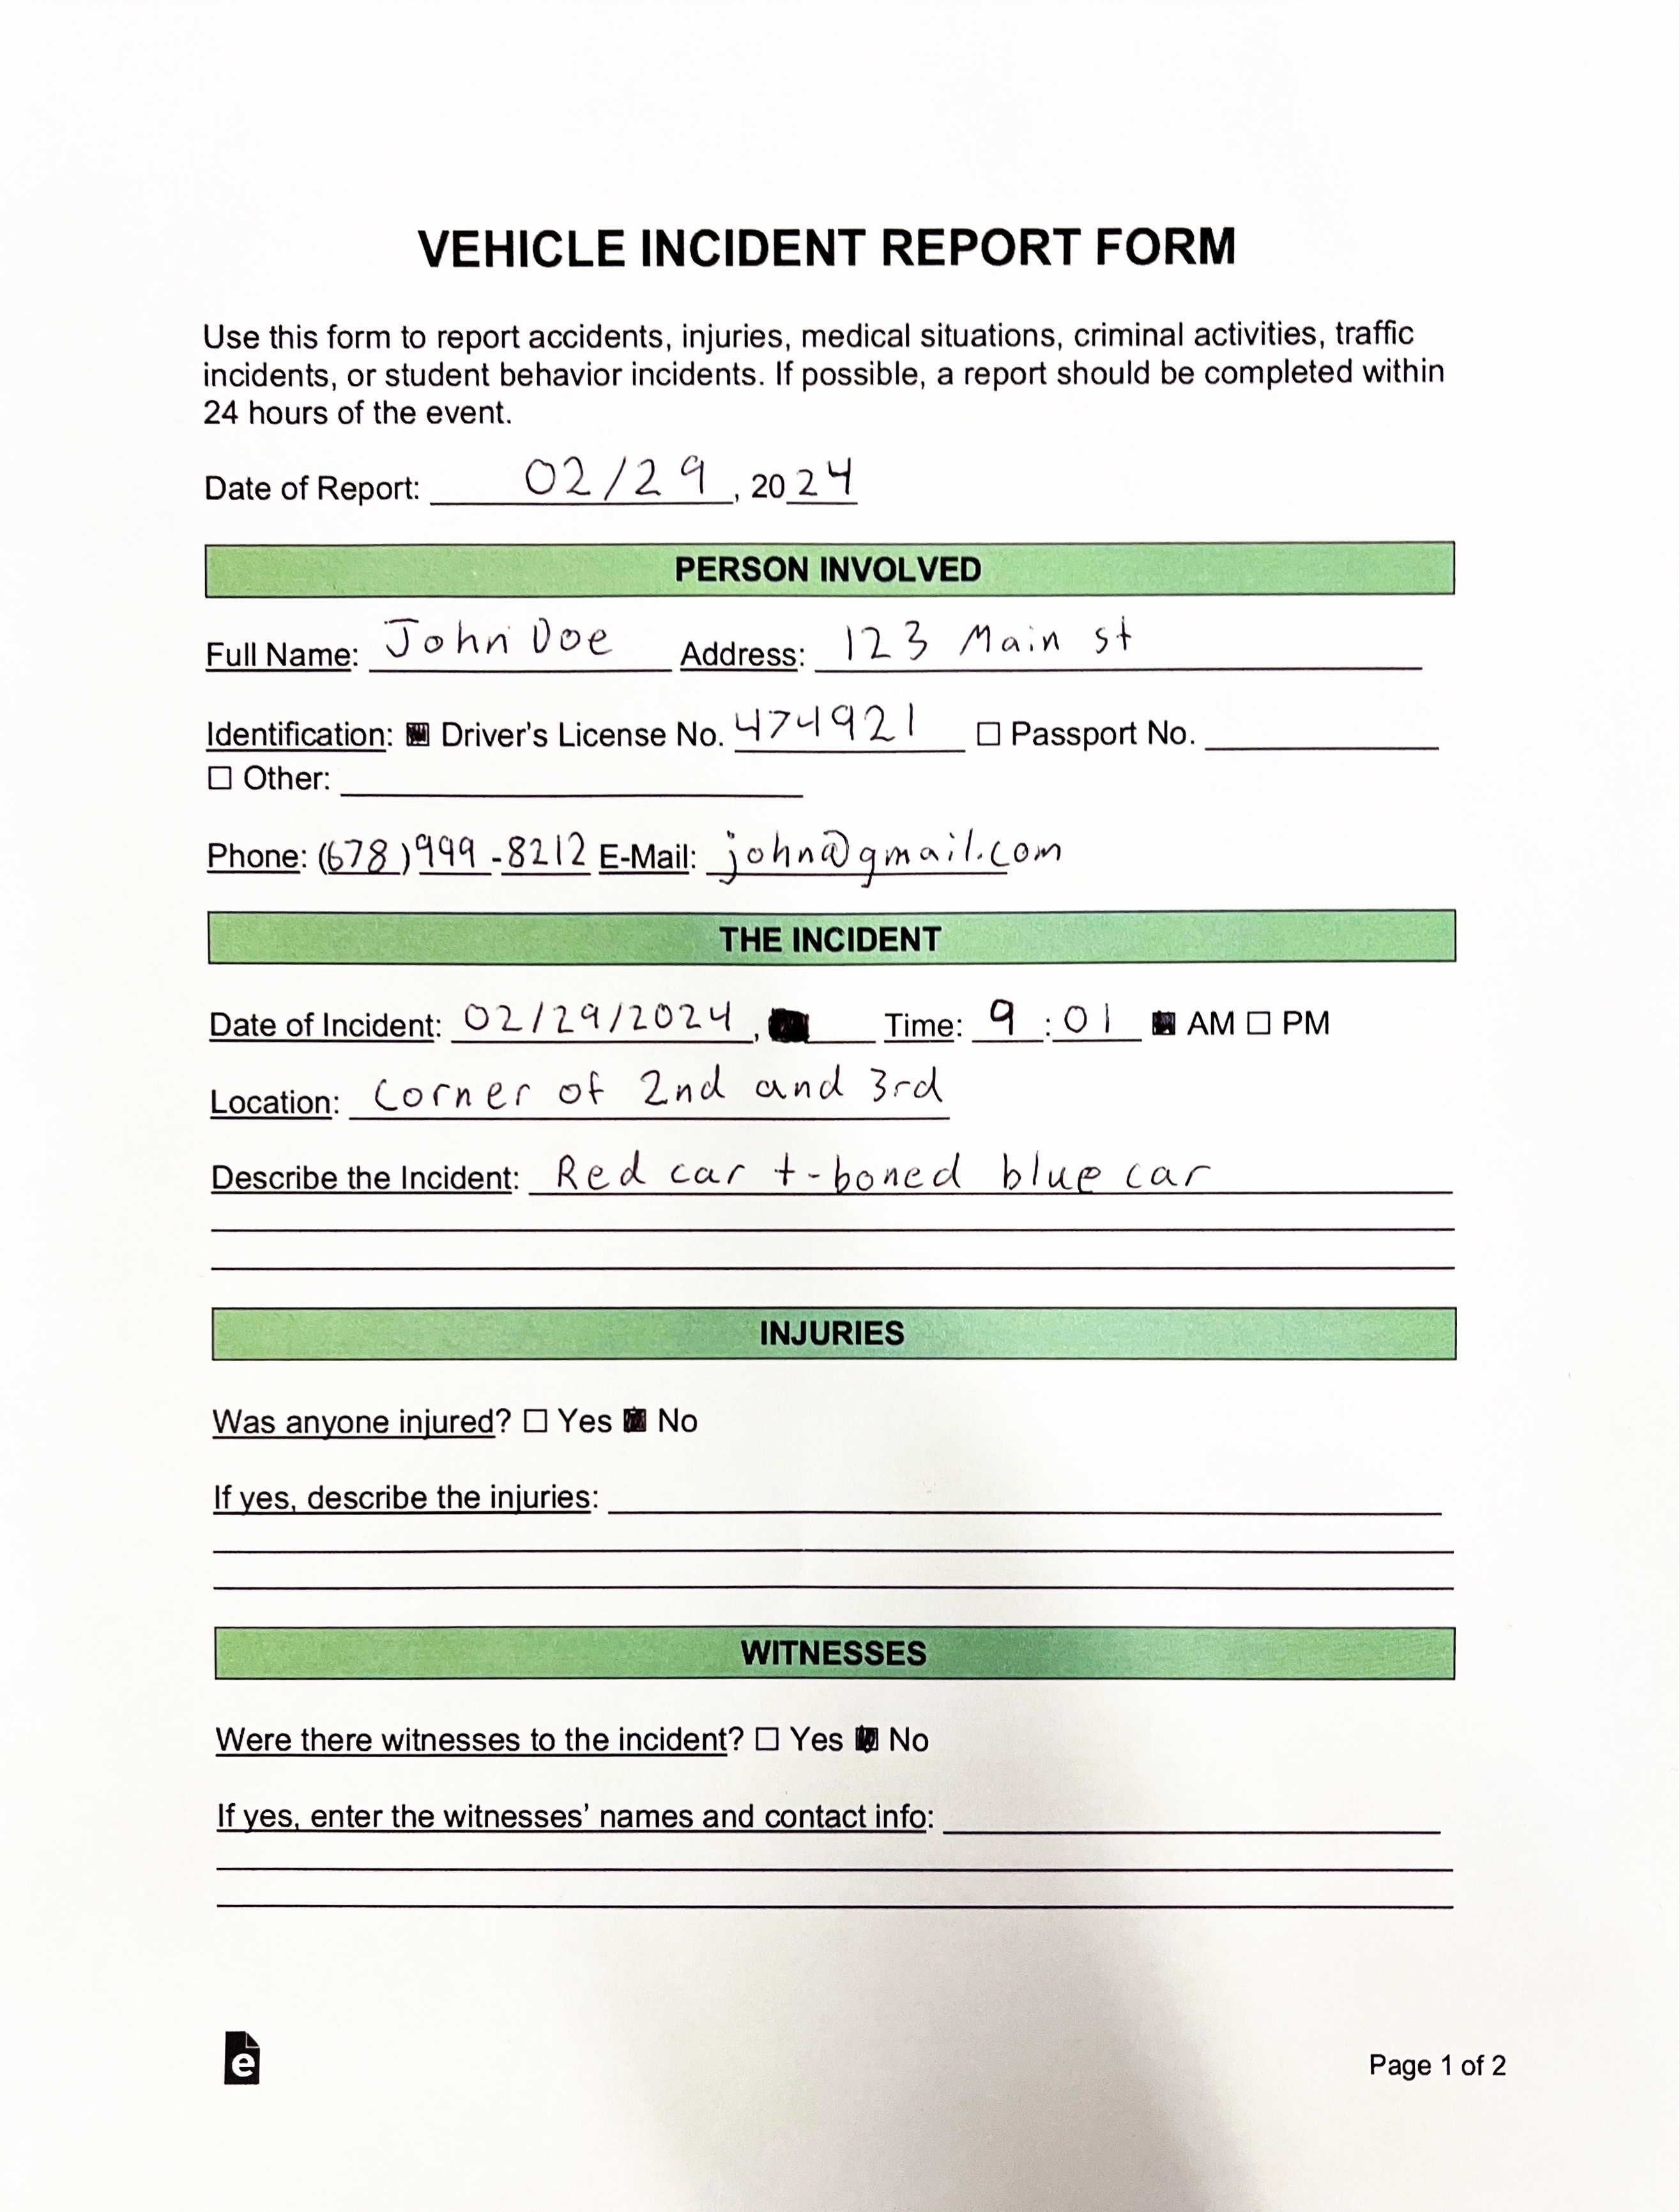

In [16]:
Image(filename='../images/transcribe/vehicle_form.jpg') 

In [17]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image("../images/transcribe/vehicle_form.jpg")}},
            {"type": "text", "text": "Transcribe this form exactly."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

VEHICLE INCIDENT REPORT FORM

Use this form to report accidents, injuries, medical situations, criminal activities, traffic incidents, or student behavior incidents. If possible, a report should be completed within 24 hours of the event.

Date of Report: 02/29, 2024

PERSON INVOLVED

Full Name: John Doe Address: 123 Main St

Identification: ■ Driver's License No. 474921 □ Passport No. ___________
□ Other: ____________________

Phone: (678) 999-8212 E-Mail: john@gmail.com

THE INCIDENT

Date of Incident: 02/29/2024 ■ Time: 9:01 ■ AM □ PM

Location: Corner of 2nd and 3rd

Describe the Incident: Red car t-boned blue car
_______________________________________________________
_______________________________________________________

INJURIES

Was anyone injured? □ Yes ■ No

If yes, describe the injuries: ________________________________________
_______________________________________________________________
_______________________________________________________________

WITNESSES

Were the

## Complicated document QA
With Claude 3 we can go beyond just transcription and ask specific questions about our information in our unstructured documents. 

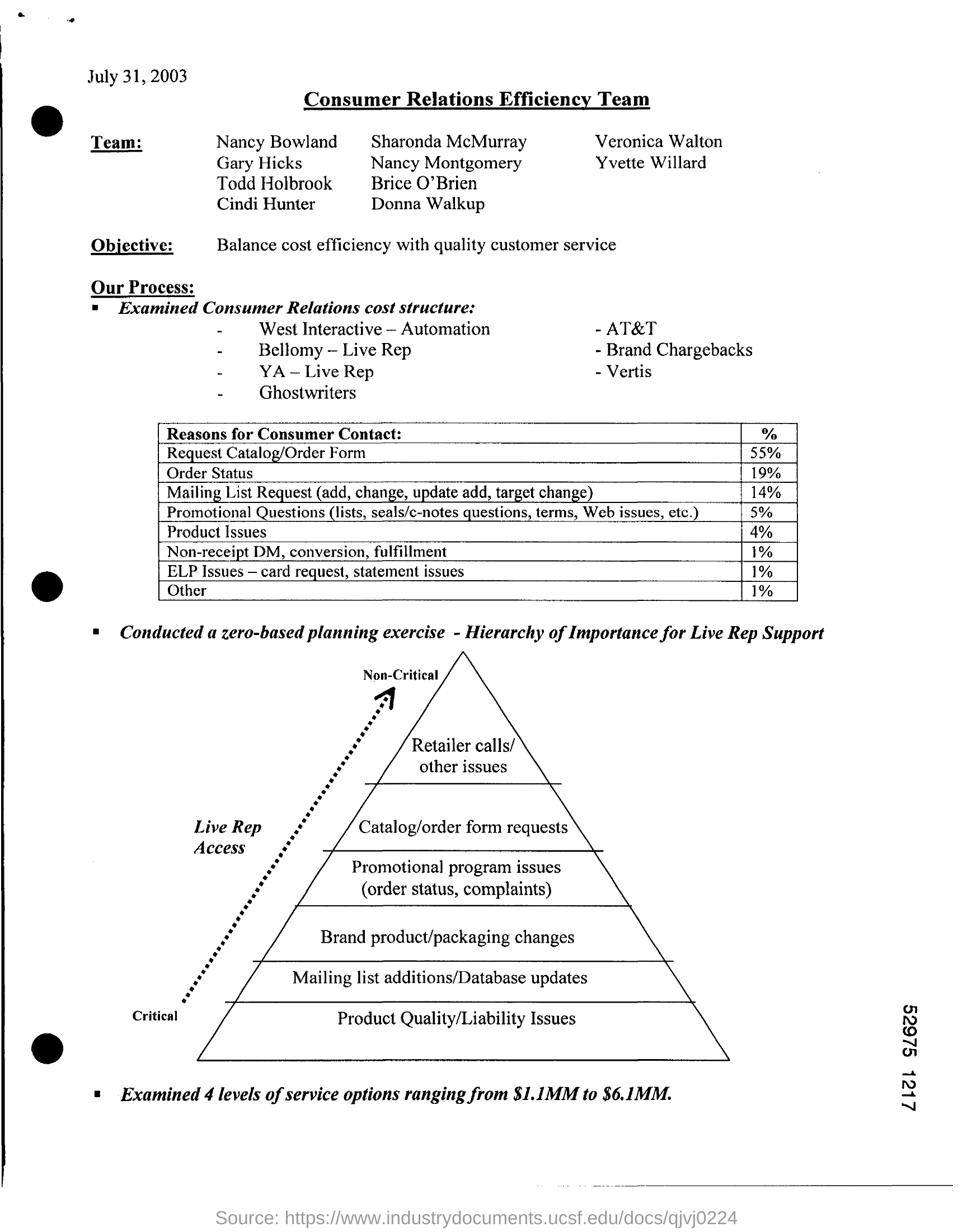

In [18]:
Image(filename='../images/transcribe/page.jpeg') 

In [19]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image("../images/transcribe/page.jpeg")}},
            {"type": "text", "text": "Which is the most critical issue for live rep support?"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

According to the hierarchy of importance pyramid for Live Rep Support shown in the image, the most critical issue is Product Quality/Liability Issues. This is positioned at the very bottom of the pyramid, indicating it is the most critical or important issue for live rep support to handle.


## Unstructured information -> JSON

Let's take a look at how you can use Claude to turn unstructured information in an image into a structured JSON output.

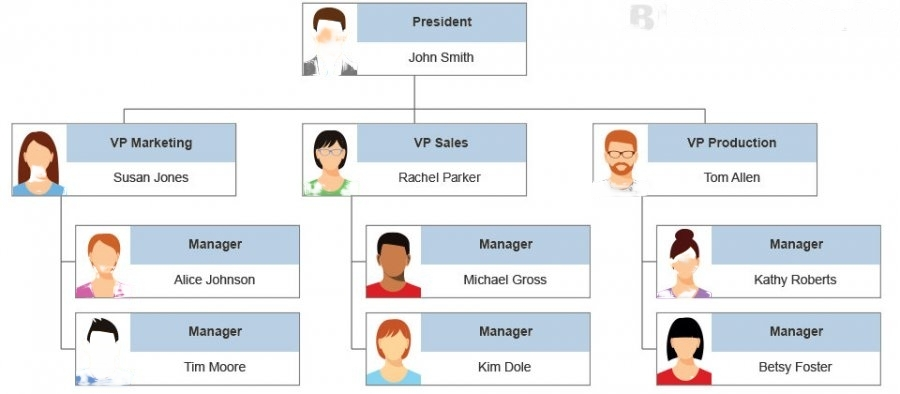

In [20]:
Image(filename='../images/transcribe/org_chart.jpeg') 

In [23]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image("../images/transcribe/org_chart.jpeg")}},
            {"type": "text", "text": "Turn this org chart into JSON indicating who reports to who. Only output the JSON and nothing else."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

{
  "President": {
    "name": "John Smith",
    "directReports": [
      {
        "name": "Susan Jones",
        "title": "VP Marketing",
        "directReports": [
          {
            "name": "Alice Johnson",
            "title": "Manager"
          },
          {
            "name": "Tim Moore",
            "title": "Manager"
          }
        ]
      },
      {
        "name": "Rachel Parker",
        "title": "VP Sales",
        "directReports": [
          {
            "name": "Michael Gross",
            "title": "Manager"
          },
          {
            "name": "Kim Dole",
            "title": "Manager"
          }
        ]
      },
      {
        "name": "Tom Allen",
        "title": "VP Production",
        "directReports": [
          {
            "name": "Kathy Roberts",
            "title": "Manager"
          },
          {
            "name": "Betsy Foster",
            "title": "Manager"
          }
        ]
      }
    ]
  }
}
